In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import timedelta
from pandas import ExcelWriter

In [92]:
df = pd.read_excel("retailtrain.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [93]:
df.shape

(379336, 8)

In [94]:
df2 = pd.read_excel("retailtest.xlsx")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,562955,84660c,PINK STITCHED WALL CLOCK,3,2011-08-11 10:14:00,7.46,NaN,United Kingdom
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom
3,577078,47369B,BLUE GREEN EMBROIDERY COSMETIC BAG,1,2011-11-17 15:17:00,5.79,NaN,United Kingdom
4,C569891,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-10-06 15:46:00,4.95,13924.0,United Kingdom


In [95]:
df2.shape

(162573, 8)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162573 entries, 0 to 162572
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    162573 non-null  object        
 1   StockCode    162573 non-null  object        
 2   Description  162082 non-null  object        
 3   Quantity     162573 non-null  int64         
 4   InvoiceDate  162573 non-null  datetime64[ns]
 5   UnitPrice    162573 non-null  float64       
 6   CustomerID   121753 non-null  float64       
 7   Country      162573 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 9.9+ MB


In [98]:
#treating missing value train
df.isnull().sum()


InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

In [99]:
# Calculating the Missing Values % contribution in DF
df_null = round(df.isnull().sum()/len(df)*100,2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.25
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.85
Country         0.00
dtype: float64

In [100]:
invoice_null_custid = set(df[df['CustomerID'].isnull()]['InvoiceNo'])
df[df['InvoiceNo'].isin(invoice_null_custid) & (~df['CustomerID'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [101]:
#drop description from train 
df = df.drop('Description', axis=1)
df = df.dropna()
df.shape

(285076, 7)

In [102]:
#treating missing value test
df2.isnull().sum()


InvoiceNo          0
StockCode          0
Description      491
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     40820
Country            0
dtype: int64

In [103]:
# Calculating the Missing Values % contribution in DF
df2_null = round(df2.isnull().sum()/len(df2)*100,2)
df2_null

InvoiceNo       0.00
StockCode       0.00
Description     0.30
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     25.11
Country         0.00
dtype: float64

In [104]:
invoice_null_custid2 = set(df2[df2['CustomerID'].isnull()]['InvoiceNo'])
df2[df2['InvoiceNo'].isin(invoice_null_custid2) & (~df2['CustomerID'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [105]:
# drop description from test
df2 = df2.drop('Description', axis=1)
df2 = df2.dropna()
df2.shape

(121753, 7)

b) Remove duplicate data records: Since our data is transactional data and it has duplicate entries for InvoiceNo and CustomerID, we will drop only those rows which are completely duplicated, not on the basis of any one particular column such as InvoiceNo or CustomerID etc.

In [106]:
df = df.drop_duplicates()
df.shape

(282418, 7)

In [107]:
df2 = df2.drop_duplicates()
df2.shape

(121285, 7)

(c) Perform descriptive anaylysis on the given data:

In [108]:
# CustomerID is 'float64', changing the datatype of CustomerId to string as Customer ID as numerical data does not make sense

df['CustomerID'] = df['CustomerID'].astype(str)

In [109]:
df2['CustomerID'] = df2['CustomerID'].astype(str)

In [110]:
df.describe(datetime_is_numeric=True)

,Quantity,InvoiceDate,UnitPrice
count,282418.000000,282418,282418.000000
mean,12.109295,2011-07-10 07:59:46.268285952,3.526324
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 13:33:00,1.250000
50%,5.000000,2011-07-29 12:41:00,1.950000
75%,12.000000,2011-10-20 11:17:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,297.109685,NaN,80.691536


In [111]:
df2.describe(datetime_is_numeric=True)

,Quantity,InvoiceDate,UnitPrice
count,121285.000000,121285,121285.000000
mean,12.174391,2011-07-11 02:01:08.914540032,3.333832
min,-2000.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-07 11:30:00,1.250000
50%,5.000000,2011-07-31 15:31:00,1.950000
75%,12.000000,2011-10-20 14:41:00,3.750000
max,3114.000000,2011-12-09 12:50:00,8142.750000
std,43.437378,NaN,30.895324


Quantity: Average quantity of each product in transaction is 12.17. Also note that minimum value in Quantity column is negative. This implies that some customers had returned the product during our period of analysis.
InvoiceDate: Our data has transaction between 01-12-2010 to 09-12-2011
UnitPrice: Average price of each product in transactions is 3.33

In [112]:
df.describe(include=['O'])



,InvoiceNo,StockCode,CustomerID,Country
count,282418,282418,282418,282418
unique,20980,3631,4353,37
top,580727,85123A,17841.0,United Kingdom
freq,388,1439,5511,251047


In [113]:
df2.describe(include=['O'])

,InvoiceNo,StockCode,CustomerID,Country
count,121285,121285,121285,121285
unique,18209,3419,4224,37
top,579196,85123A,17841.0,United Kingdom
freq,170,630,2380,107748


(B) Data Transformation
(2) Perform Cohort Analysis

(a) Create month cohort of customers and analyze active customers in each cohort:

In [114]:
# Convert to InvoiceDate to Year-Month format
df['month_year'] = df['InvoiceDate'].dt.to_period('M')
df['month_year'].nunique()

13

In [115]:
month_cohort = df.groupby('month_year')['CustomerID'].nunique()
month_cohort

month_year
2010-12     929
2011-01     772
2011-02     776
2011-03    1005
2011-04     887
2011-05    1064
2011-06    1031
2011-07     973
2011-08     962
2011-09    1273
2011-10    1411
2011-11    1698
2011-12     663
Freq: M, Name: CustomerID, dtype: int64

Text(0.5, 1.0, 'No. of active customers in each month')

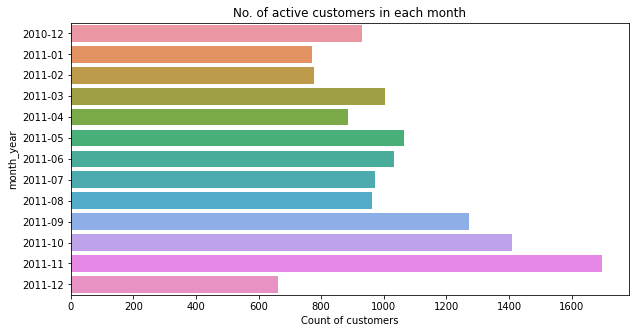

In [116]:
plt.figure(figsize=(10,5))
sns.barplot(y = month_cohort.index, x = month_cohort.values);
plt.xlabel("Count of customers")
plt.title("No. of active customers in each month")

In [117]:
df2['month_year'] = df2['InvoiceDate'].dt.to_period('M')
df2['month_year'].nunique()

13

In [118]:
month_cohort2 = df2.groupby('month_year')['CustomerID'].nunique()
month_cohort2

month_year
2010-12     860
2011-01     713
2011-02     730
2011-03     940
2011-04     828
2011-05    1004
2011-06     959
2011-07     912
2011-08     899
2011-09    1224
2011-10    1331
2011-11    1612
2011-12     617
Freq: M, Name: CustomerID, dtype: int64

Text(0.5, 1.0, 'No. of active customers in each month')

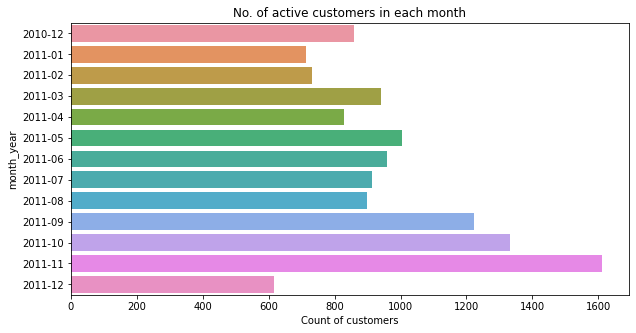

In [119]:
plt.figure(figsize=(10,5))
sns.barplot(y = month_cohort2.index, x = month_cohort2.values);
plt.xlabel("Count of customers")
plt.title("No. of active customers in each month")

(b) Analyze the retention rate of customers:

In [120]:
month_cohort - month_cohort.shift(1)

month_year
2010-12       NaN
2011-01    -157.0
2011-02       4.0
2011-03     229.0
2011-04    -118.0
2011-05     177.0
2011-06     -33.0
2011-07     -58.0
2011-08     -11.0
2011-09     311.0
2011-10     138.0
2011-11     287.0
2011-12   -1035.0
Freq: M, Name: CustomerID, dtype: float64

In [121]:
retention_rate = round(month_cohort.pct_change(periods=1)*100,2)
retention_rate

month_year
2010-12      NaN
2011-01   -16.90
2011-02     0.52
2011-03    29.51
2011-04   -11.74
2011-05    19.95
2011-06    -3.10
2011-07    -5.63
2011-08    -1.13
2011-09    32.33
2011-10    10.84
2011-11    20.34
2011-12   -60.95
Freq: M, Name: CustomerID, dtype: float64

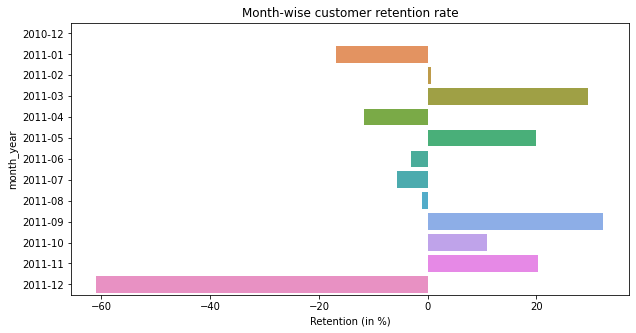

In [122]:
plt.figure(figsize=(10,5))
sns.barplot(y = retention_rate.index, x = retention_rate.values);
plt.xlabel("Retention (in %)")
plt.title("Month-wise customer retention rate");

Week 2:
Monetary analysis:

In [123]:
df['amount'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,amount
1,556072,20970,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06,30.00
2,551739,21559,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05,5.10
3,541658,21988,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01,0.85
4,538364,85099C,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12,19.50
5,552306,84789,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05,15.00


In [124]:
df_monetary = df.groupby('CustomerID').sum()['amount'].reset_index()
df_monetary

,CustomerID,amount
0,12346.0,0.00
1,12347.0,3124.96
2,12348.0,1009.88
3,12349.0,1344.17
4,12350.0,213.30
...,...,...
4348,18280.0,91.70
4349,18281.0,59.28
4350,18282.0,118.16
4351,18283.0,1450.29


Frequency Analysis:

In [125]:
df_frequency = df.groupby('CustomerID').nunique()['InvoiceNo'].reset_index()
# df_freqency = df.drop_duplicates('InvoiceNo').groupby('CustomerID').count()['InvoiceNo'].reset_index()
df_frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4348,18280.0,1
4349,18281.0,1
4350,18282.0,3
4351,18283.0,16


Recency Analysis:

In [126]:
#We will fix reference date for calculating recency as last transaction day in data + 1 day
ref_day = max(df['InvoiceDate']) + timedelta(days=1)
df['days_to_last_order'] = (ref_day - df['InvoiceDate']).dt.days
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,amount,days_to_last_order
1,556072,20970,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06,30.00,184
2,551739,21559,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05,5.10,220
3,541658,21988,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01,0.85,324
4,538364,85099C,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12,19.50,364
5,552306,84789,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05,15.00,215


In [127]:
df_recency = df.groupby('CustomerID')['days_to_last_order'].min().reset_index()
df_recency

,CustomerID,days_to_last_order
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
4348,18280.0,278
4349,18281.0,181
4350,18282.0,8
4351,18283.0,4


Calculate RFM metrics:

In [128]:
df_rf = pd.merge(df_recency, df_frequency,  on='CustomerID', how='inner')
df_rfm = pd.merge(df_rf, df_monetary, on='CustomerID', how='inner')
df_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,3124.96
2,12348.0,75,4,1009.88
3,12349.0,19,1,1344.17
4,12350.0,310,1,213.30


Build RFM Segments:

newest    2715
newer      584
medium     417
older      355
oldest     282
Name: recency_labels, dtype: int64

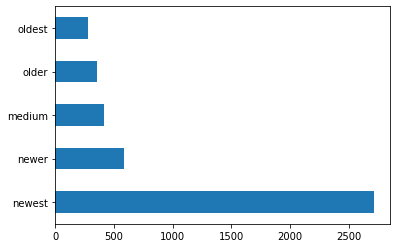

In [129]:
df_rfm['recency_labels'] = pd.cut(df_rfm['Recency'], bins=5,
                                     labels=['newest', 'newer', 'medium', 'older', 'oldest'])
df_rfm['recency_labels'].value_counts().plot(kind='barh');
df_rfm['recency_labels'].value_counts()

lowest     4332
lower        15
medium        3
highest       2
higher        1
Name: frequency_labels, dtype: int64

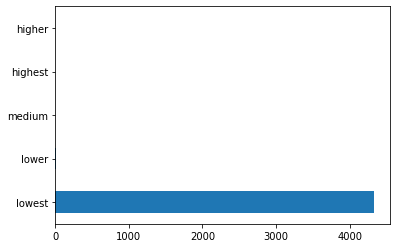

In [130]:
df_rfm['frequency_labels'] = pd.cut(df_rfm['Frequency'], bins=5, labels=['lowest', 'lower', 'medium', 'higher', 'highest'])
df_rfm['frequency_labels'].value_counts().plot(kind='barh');
df_rfm['frequency_labels'].value_counts()

smallest    4338
smaller        9
medium         3
largest        2
larger         1
Name: monetary_labels, dtype: int64

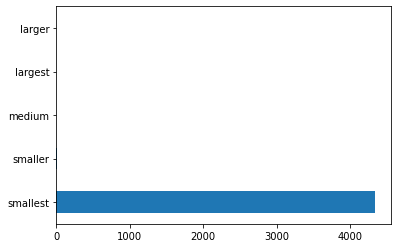

In [131]:
df_rfm['monetary_labels'] = pd.cut(df_rfm['Monetary'], bins=5, labels=['smallest', 'smaller', 'medium', 'larger', 'largest'])
df_rfm['monetary_labels'].value_counts().plot(kind='barh');
df_rfm['monetary_labels'].value_counts()

In [132]:
df_rfm['rfm_segment'] = df_rfm[['recency_labels','frequency_labels','monetary_labels']].agg('-'.join, axis=1)
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest
1,12347.0,2,7,3124.96,newest,lowest,smallest,newest-lowest-smallest
2,12348.0,75,4,1009.88,newest,lowest,smallest,newest-lowest-smallest
3,12349.0,19,1,1344.17,newest,lowest,smallest,newest-lowest-smallest
4,12350.0,310,1,213.30,oldest,lowest,smallest,oldest-lowest-smallest


smallest    4338
smaller        9
medium         3
largest        2
larger         1
Name: monetary_labels, dtype: int64

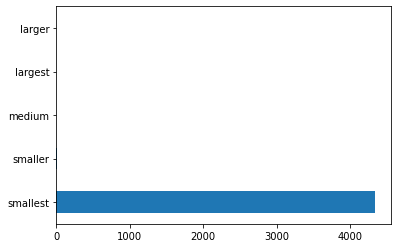

In [133]:
df_rfm['monetary_labels'] = pd.cut(df_rfm['Monetary'], bins=5, labels=['smallest', 'smaller', 'medium', 'larger', 'largest'])
df_rfm['monetary_labels'].value_counts().plot(kind='barh');
df_rfm['monetary_labels'].value_counts()

In [134]:
df_rfm['rfm_segment'] = df_rfm[['recency_labels','frequency_labels','monetary_labels']].agg('-'.join, axis=1)
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest
1,12347.0,2,7,3124.96,newest,lowest,smallest,newest-lowest-smallest
2,12348.0,75,4,1009.88,newest,lowest,smallest,newest-lowest-smallest
3,12349.0,19,1,1344.17,newest,lowest,smallest,newest-lowest-smallest
4,12350.0,310,1,213.30,oldest,lowest,smallest,oldest-lowest-smallest


RFM Score:

In [135]:
recency_dict = {'newest': 5, 'newer':4, 'medium': 3, 'older':2, 'oldest':1}
frequency_dict = {'lowest':1, 'lower':2, 'medium': 3, 'higher':4, 'highest':5}
monetary_dict = {'smallest':1, 'smaller':2, 'medium': 3, 'larger':4, 'largest':5}

df_rfm['rfm_score'] = df_rfm['recency_labels'].map(recency_dict).astype(int)+ df_rfm['frequency_labels'].map(frequency_dict).astype(int) + df_rfm['monetary_labels'].map(monetary_dict).astype(int)
df_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3
1,12347.0,2,7,3124.96,newest,lowest,smallest,newest-lowest-smallest,7
2,12348.0,75,4,1009.88,newest,lowest,smallest,newest-lowest-smallest,7
3,12349.0,19,1,1344.17,newest,lowest,smallest,newest-lowest-smallest,7
4,12350.0,310,1,213.30,oldest,lowest,smallest,oldest-lowest-smallest,3
5,12352.0,36,10,1469.03,newest,lowest,smallest,newest-lowest-smallest,7
6,12353.0,204,1,71.30,medium,lowest,smallest,medium-lowest-smallest,5
7,12354.0,232,1,848.02,older,lowest,smallest,older-lowest-smallest,4
8,12355.0,214,1,370.80,medium,lowest,smallest,medium-lowest-smallest,5
9,12356.0,23,3,2080.18,newest,lowest,smallest,newest-lowest-smallest,7


analyze RFM Segment and Score:

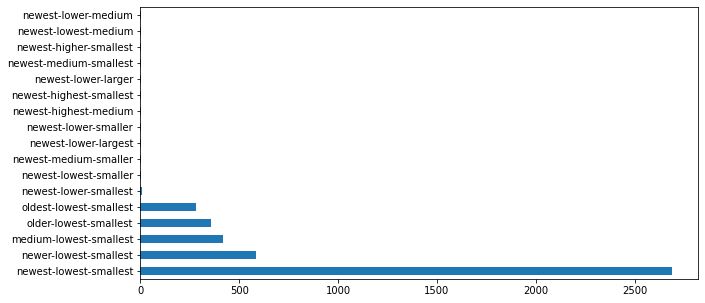

In [136]:
df_rfm['rfm_segment'].value_counts().plot(kind='barh', figsize=(10, 5));

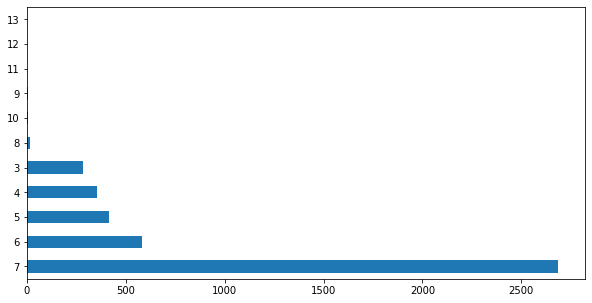

In [137]:
df_rfm['rfm_score'].value_counts().plot(kind='barh', figsize=(10, 5));

Week 3
Data Modeling:
Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

In [138]:
print(df_rfm.shape)
df_rfm.head()

(4353, 9)


,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3
1,12347.0,2,7,3124.96,newest,lowest,smallest,newest-lowest-smallest,7
2,12348.0,75,4,1009.88,newest,lowest,smallest,newest-lowest-smallest,7
3,12349.0,19,1,1344.17,newest,lowest,smallest,newest-lowest-smallest,7
4,12350.0,310,1,213.30,oldest,lowest,smallest,oldest-lowest-smallest,3


In [139]:
print(df_rfm.shape)
df_rfm.head()

(4353, 9)


,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3
1,12347.0,2,7,3124.96,newest,lowest,smallest,newest-lowest-smallest,7
2,12348.0,75,4,1009.88,newest,lowest,smallest,newest-lowest-smallest,7
3,12349.0,19,1,1344.17,newest,lowest,smallest,newest-lowest-smallest,7
4,12350.0,310,1,213.30,oldest,lowest,smallest,oldest-lowest-smallest,3


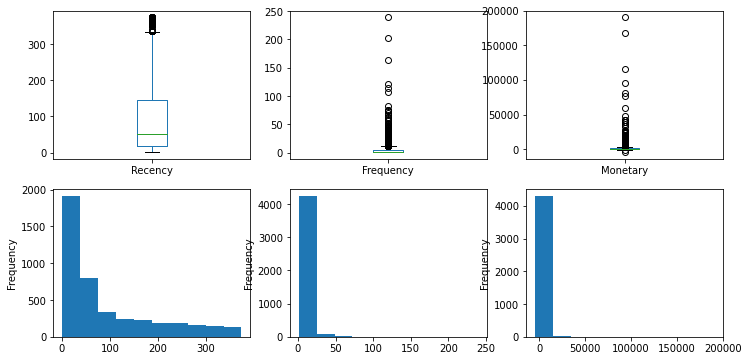

In [140]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    df_rfm[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    df_rfm[feature].plot(kind='hist')

Outliers: Frequency and Monetary features in above data seem to have lot of outliers. Lets drop them.

In [141]:
df_rfm = df_rfm[(df_rfm['Frequency']<60) & (df_rfm['Monetary']<40000)]
df_rfm.shape

(4332, 9)

21 customers removed as outliers

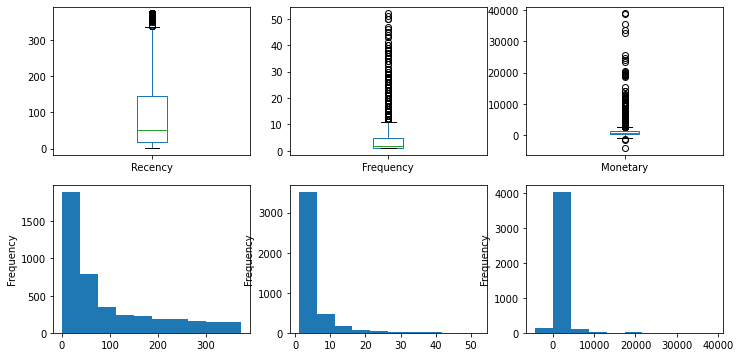

In [142]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    df_rfm[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    df_rfm[feature].plot(kind='hist')

Log Transformation: Now since all three features have right skewed data therefore we will use log transformation of these features in our model.

In [143]:
df_rfm_log_trans = pd.DataFrame()
df_rfm_log_trans['Recency'] = np.log(df_rfm['Recency'])
df_rfm_log_trans['Frequency'] = np.log(df_rfm['Frequency'])
df_rfm_log_trans['Monetary'] = np.log(df_rfm['Monetary']-df_rfm['Monetary'].min()+1)

Standard Scalar Transformation: It is extremely important to rescale the features so that they have a comparable scale.

In [144]:
scaler = StandardScaler()

df_rfm_scaled = scaler.fit_transform(df_rfm_log_trans[['Recency', 'Frequency', 'Monetary']])
df_rfm_scaled

df_rfm_scaled = pd.DataFrame(df_rfm_scaled)
df_rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
df_rfm_scaled.head()

,Recency,Frequency,Monetary
0,1.400876,-0.356046,-0.671148
1,-2.113713,1.016963,1.353127
2,0.387012,0.403633,0.110896
3,-0.560365,-1.115725,0.337164
4,1.366153,-1.115725,-0.491635


# Build K-Means Clustering Model and Decide the optimum number of clusters to be formed.

In [145]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [146]:
kmeans.labels_

array([0, 1, 2, ..., 2, 1, 2], dtype=int32)

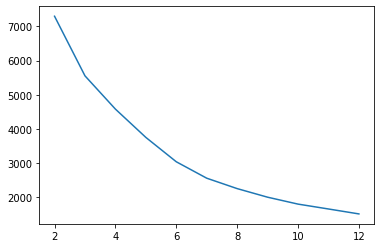

In [147]:
# Finding the Optimal Number of Clusters with the help of Elbow Curve/ SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(df_rfm_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters,ssd);

In [148]:
# Creating dataframe for exporting to create visualization in tableau later
df_inertia = pd.DataFrame(list(zip(range_n_clusters, ssd)), columns=['clusters', 'intertia'])
df_inertia

,clusters,intertia
0,2,7295.445493
1,3,5552.489257
2,4,4580.192596
3,5,3752.905040
4,6,3040.626290
5,7,2560.328623
6,8,2255.975861
7,9,2004.758962
8,10,1802.721254
9,11,1660.255591


In [149]:
  # Finding the Optimal Number of Clusters with the help of Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_rfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(df_rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.44213381508544686
For n_clusters=3, the silhouette score is 0.39108351410795406
For n_clusters=4, the silhouette score is 0.3929396304053463
For n_clusters=5, the silhouette score is 0.3666733256568387
For n_clusters=6, the silhouette score is 0.35017380743196763
For n_clusters=7, the silhouette score is 0.35134903938244527
For n_clusters=8, the silhouette score is 0.35373826961422816
For n_clusters=9, the silhouette score is 0.35699476349422654
For n_clusters=10, the silhouette score is 0.3671283076402524


We can select optimum number of clusters as 3 in our final model


In [150]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

c. Analyze these clusters and comment on the results.

In [151]:
# assign the label
df_rfm['Cluster_Id'] = kmeans.labels_
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score,Cluster_Id
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3,0
1,12347.0,2,7,3124.96,newest,lowest,smallest,newest-lowest-smallest,7,1
2,12348.0,75,4,1009.88,newest,lowest,smallest,newest-lowest-smallest,7,2
3,12349.0,19,1,1344.17,newest,lowest,smallest,newest-lowest-smallest,7,0
4,12350.0,310,1,213.30,oldest,lowest,smallest,oldest-lowest-smallest,3,0


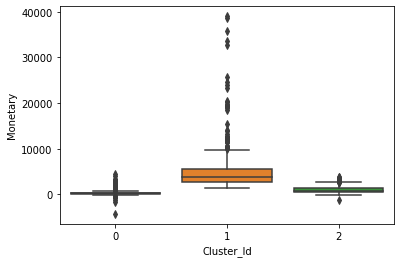

In [152]:
# Box plot to visualize Cluster Id vs Monetary
sns.boxplot(x='Cluster_Id', y='Monetary', data=df_rfm);

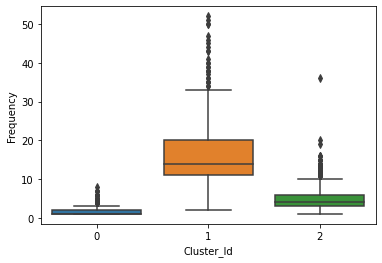

In [153]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=df_rfm);

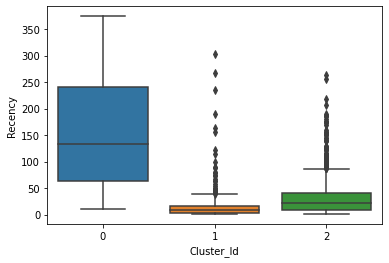

In [154]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data=df_rfm);

Inference:
As we can observe from above boxplots that our model has nicely created 3 segements of customer with the interpretation as below:

Customers with Cluster Id 0 are less frequent buyers with low monetary expenditure and also they have not purchased anything in recent time and hence least important for business.
Customers with Cluster Id 1 are the customers having Recency, Frequency and Monetary score in the medium range.
Customers with Cluster Id 2 are the most frequent buyers, spending high amount and recently placing orders so they are the most important customers from business point of view.
Week 4:
Data Reporting:

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

 a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures
 b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold
 c. Bar graph to show the count of orders vs. hours throughout the day
 d. Plot the distribution of RFM values using histogram and frequency charts
 e. Plot error (cost) vs. number of clusters selected
 f. Visualize to compare the RFM values of the clusters using heatmap

In [155]:
# Writing dataframe to excel file for creating visualization in tableau
writer = pd.ExcelWriter('C:\\Users\\mgupt\\mgpython\\Capstone Project\\Retail - PGP\\output_data.xlsx', engine='xlsxwriter')

df.to_excel(writer, sheet_name='master_data', index=False)
df_rfm.to_excel(writer, sheet_name='rfm_data', index=False)
df_inertia.to_excel(writer, sheet_name='inertia', index=False)
writer.save()

In [ ]:
product_desc = pd.read_excel("Online Retail.xlsx")
product_desc = product_desc[['StockCode', 'Description']]
product_desc = product_desc.drop_duplicates()
product_desc.to_csv('product_desc.csv', index=False)